### EXPLORATORY DATA ANALYSIS ###

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = pd.read_csv("../data/processed/cleaned.csv", parse_dates=["od_start_time", "od_end_time"])
df_trips = pd.read_csv("../data/processed/trips.csv", parse_dates=["od_start_time", "od_end_time"])
df_routes = pd.read_csv("../data/processed/routes.csv", parse_dates=["route_start_time", "route_end_time"])


In [20]:
import sys
from pathlib import Path

src_path = Path("../src").resolve()  # adjust relative to the notebook location
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

In [21]:
from data_viz import (
    plot_trip_start_times,
    plot_trip_durations,
    plot_top_source_centers,
    plot_trip_delay,
    plot_trip_volume_by_day,
    plot_sla_breaches,
    plot_geographic_distribution
)

# 1. Distribution of Trip Start Times

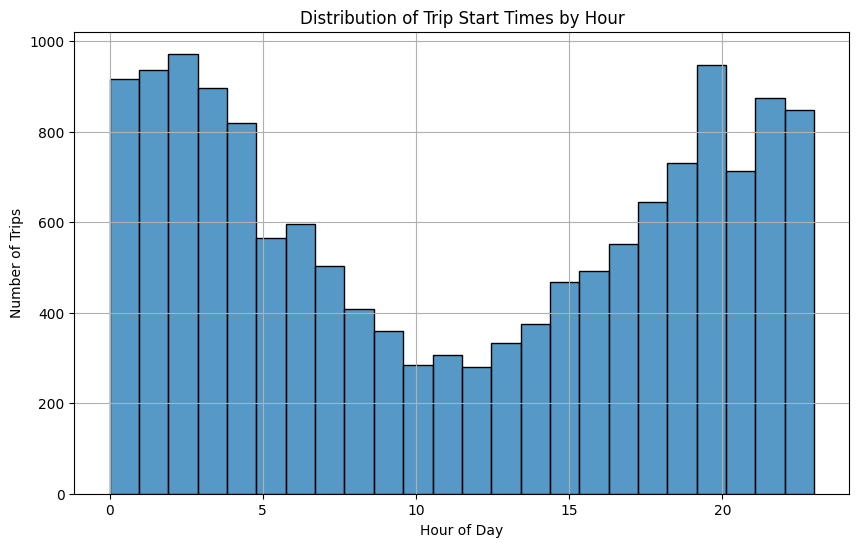

In [22]:
plot_trip_start_times(df_trips)

# 2. Distribution of Trip Durations

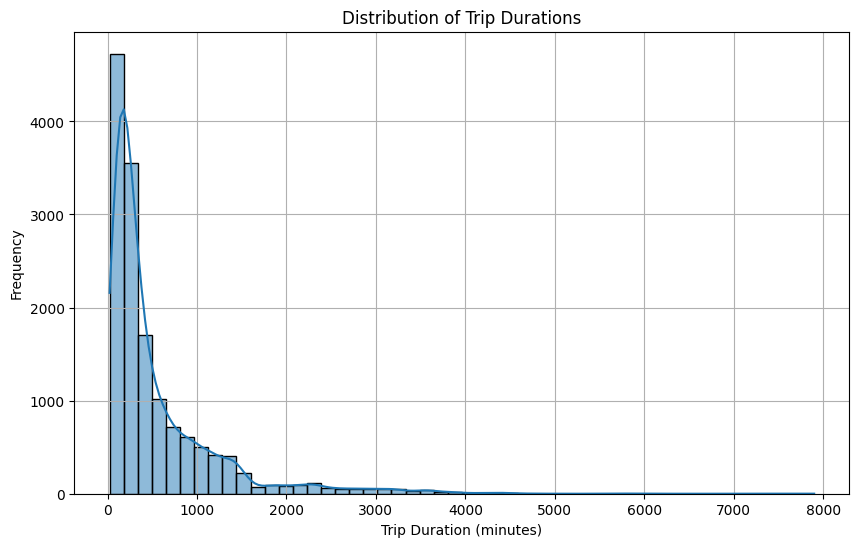

In [23]:
plot_trip_durations(df_trips)

# 3. Top Source Centres

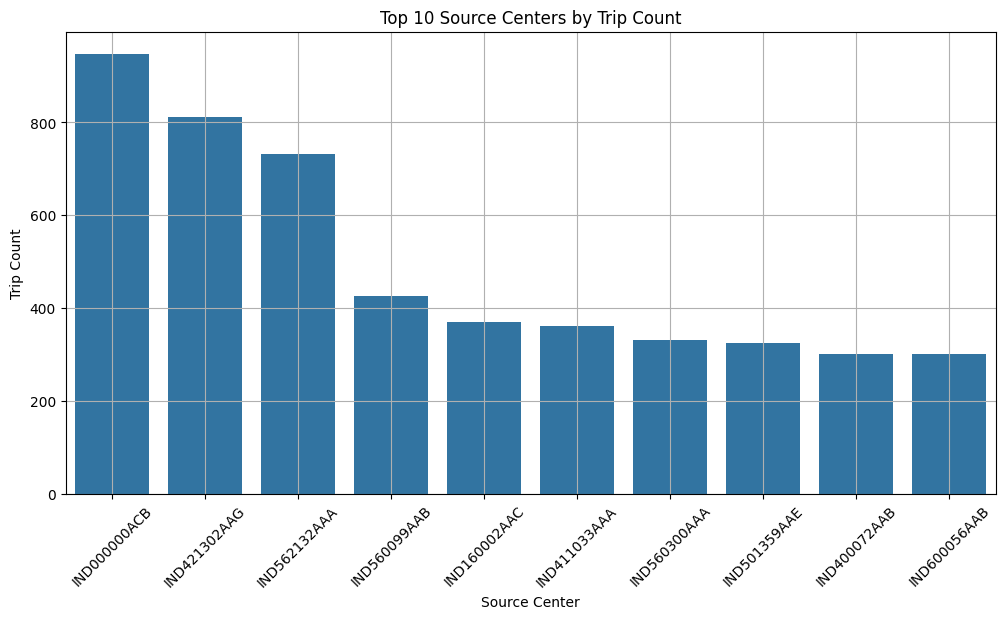

In [24]:
plot_top_source_centers(df_trips)

# 4. Distribution of Trip Delays (Actual vs Planned Times)

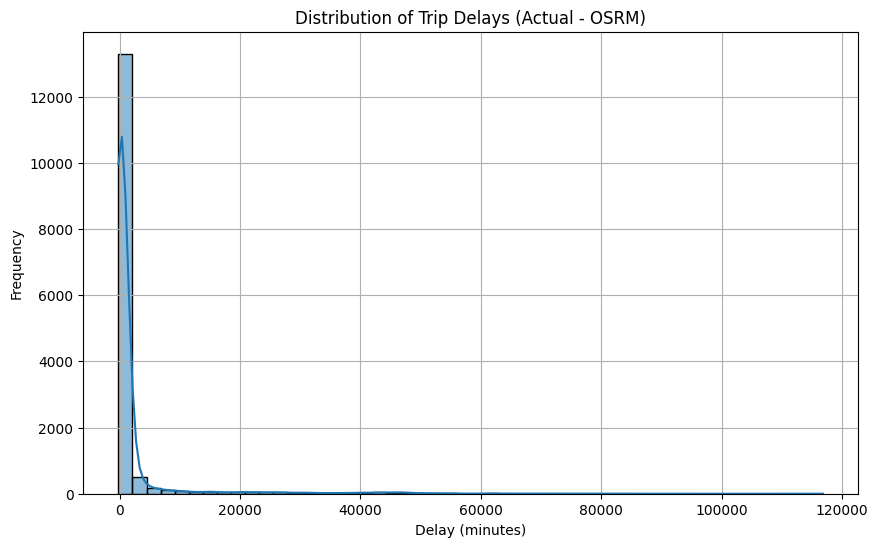

In [25]:
plot_trip_delay(df_trips)

# 5. Trip Volume over Time

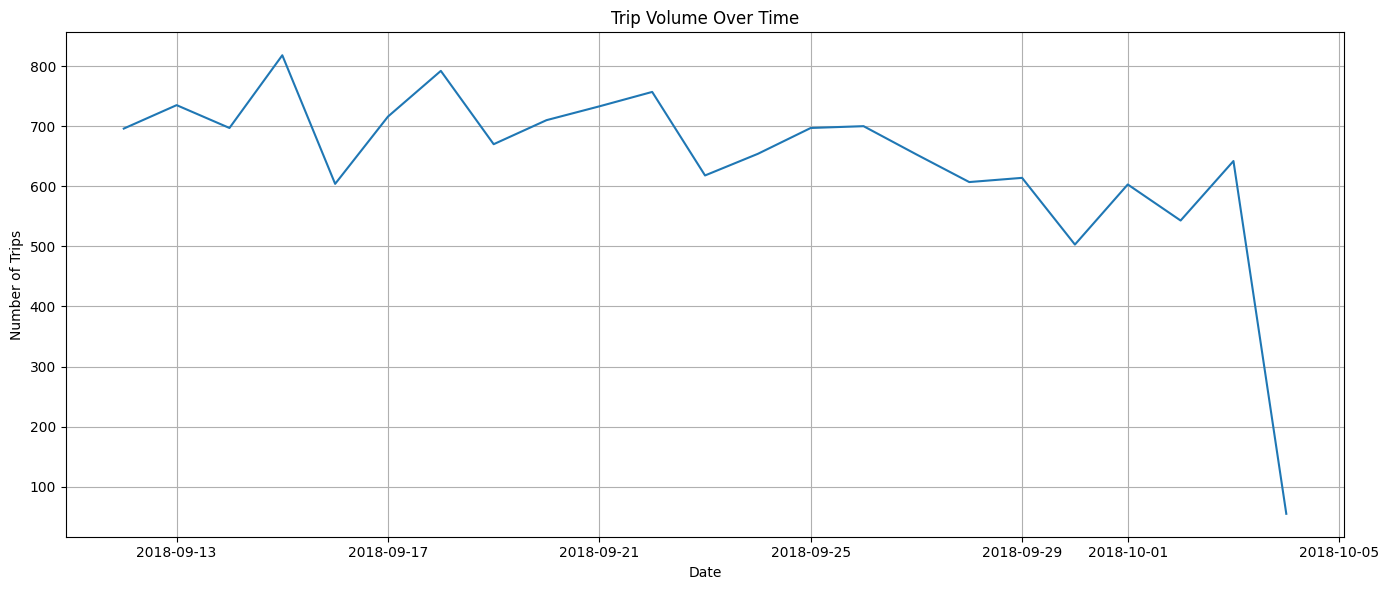

In [26]:
plot_trip_volume_by_day(df_trips)

# 6. SLA Breach Distribution (Over 30 mins late = Breach)

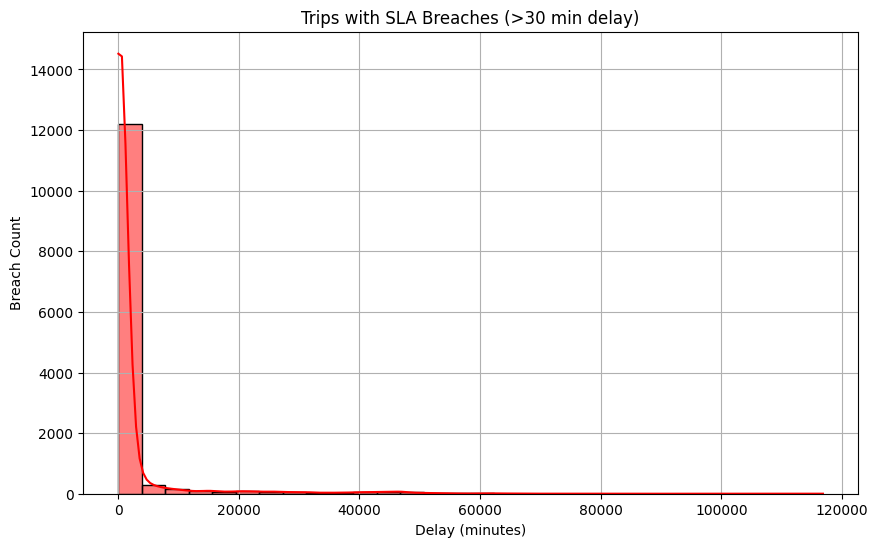

In [27]:
plot_sla_breaches(df_trips, threshold_minutes=30)

# 7. Top 20 Route Pairs by Volume

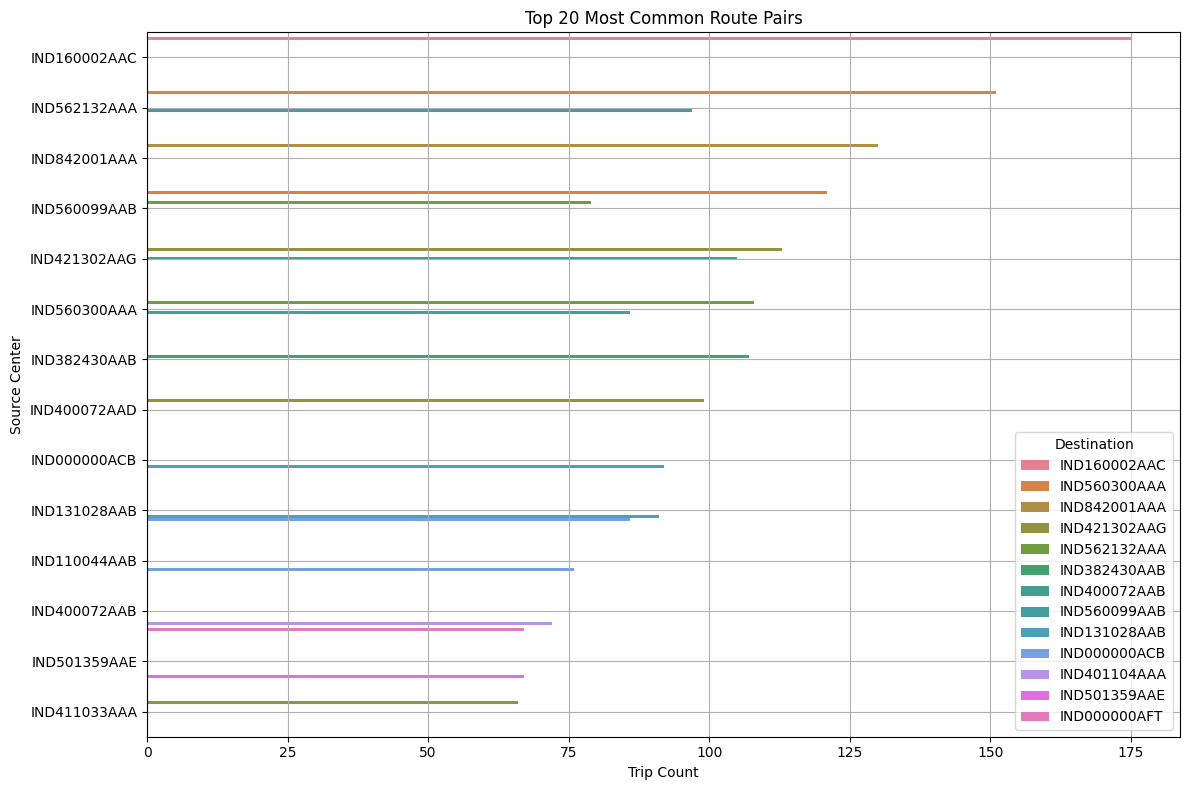

In [28]:
plot_geographic_distribution(df_trips)